In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import performance
import neural_net
from utils import activation_functions as activations
import h5py

## Binary classification: Cats recognition

In [2]:
np.random.seed(1)

def load_data():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5',"r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # training set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # training set labels

    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [3]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

y = 1. It's a cat picture.


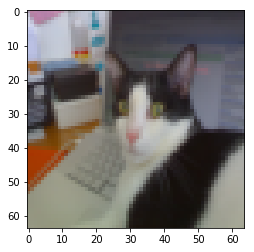

In [4]:
# Example of a picture
index = 111
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [5]:
# Explore your dataset
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print("Number of training examples: " + str(m_train))
print("Number of testing examples: " + str(m_test))
print("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print("train_x_orig shape: " + str(train_x_orig.shape))
print("train_y shape: " + str(train_y.shape))
print("test_x_orig shape: " + str(test_x_orig.shape))
print("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


In [6]:
# Reshape the training and test examples
train_x_flatten = train_x_orig.reshape(
    train_x_orig.shape[0],
    -1).T  # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten / 255.
test_x = test_x_flatten / 255.

print("train_x's shape: " + str(train_x.shape))
print("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


**INSTANCIATING THE MODEL**

In [7]:
np.random.seed(22)
layers_dims = [train_x.shape[0], 20, 7, 5, train_y.shape[0]]  #  4-layer model
init_method = 'he'
activation = 'relu'
lambd = 0
learning_rate = 0.00075
optimizer_name = 'adam'
num_epochs = 200

clf = neural_net.MLNN(layers_dims, init_method, activation, lambd,
                      optimizer_name, learning_rate, num_epochs)

**TRAINING THE MODEL**

In [8]:
clf.train(train_x, train_y)

**MAKING PREDICTIONS**

In [9]:
training_predictions = clf.predict(train_x)
test_predictions = clf.predict(test_x)

In [10]:
training_accuracy = performance.compute_accuracy(train_y, training_predictions)
print('training accuracy: ', training_accuracy, '%')

test_accuracy = performance.compute_accuracy(test_y, test_predictions)
print('test accuracy: ', test_accuracy, '%')

training accuracy:  65.55023923444976 %
test accuracy:  34.0 %


In [11]:
params = clf.get_params()

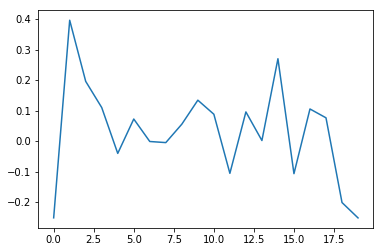

In [12]:
plt.plot(params['costs'])

## Multi-class classification: MNIST handwritten digits recognition

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.io import loadmat  # SciPy module to load .mat files
from utils import helpers

sns.set_style('darkgrid')

In [14]:
mnist = loadmat('mnist-dataset/mnist-original.mat')

In [15]:
# A sample of size 70.000 of 28x28 = 784pixels grayscale images
mnist['data'].shape

(784, 70000)

In [16]:
# Labels corresponding to each image
mnist['label'].shape

(1, 70000)

In [17]:
# Combining data and label in one dataframe
nb_pixels = mnist['data'].shape[0]
nb_images = mnist['data'].shape[1]

mnist_dataset = pd.DataFrame(mnist['data'].T)
mnist_dataset.columns = ['x_{index}'.format(index=i) for i in range(nb_pixels)]
mnist_dataset['label'] = mnist['label'].T.astype(int)

In [31]:
sample_size = 100
mnist_dataset_sample = mnist_dataset.sample(n=sample_size)

In [32]:
X = mnist_dataset_sample.drop('label', 1).T.values
y = np.atleast_2d(mnist_dataset_sample['label'])
classes = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [33]:
# on hot encoding y
y_enc = helpers.one_hot_encoding(y, classes)

In [34]:
layers_dims = [X.shape[0], 20, 10, 5, y_enc.shape[0]]  #  4-layer model
init_method = 'he'
activation = 'relu'
lambd = 0
learning_rate = 0.00075
optimizer_name = 'adam'
num_epochs = 100

clf = neural_net.MLNN(layers_dims, init_method, activation, lambd,
                      optimizer_name, learning_rate, num_epochs, minibatch_size=10)

In [35]:
clf.train(X, y_enc)

In [36]:
params = clf.get_params()

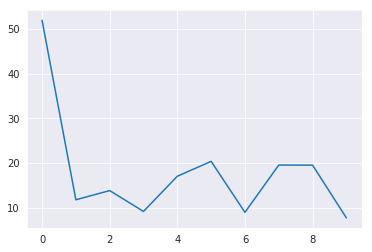

In [37]:
plt.plot(params['costs'])

In [38]:
training_predictions = clf.predict(X)

In [39]:
print('Our model accuracy', np.sum(np.equal(y, training_predictions))/float(y.size))

Our model accuracy 0.42


In [40]:
from sklearn.neural_network import MLPClassifier

In [41]:
clf = MLPClassifier(hidden_layer_sizes=(20,10,5), learning_rate_init=learning_rate)
clf.fit(X.T, y.flatten())

/home/whitenoise/anaconda3/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20, 10, 5), learning_rate='constant',
       learning_rate_init=0.00075, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [42]:
pred = clf.predict(X.T)

In [43]:
print('sklearn accuracy', np.sum(np.equal(y, pred))/float(y.size))

sklearn accuracy 0.18
